Tempered Iris dataset : https://gist.githubusercontent.com/hafsahabib-educator/d9ac9be247866dba0c6f0b5debb9f5a0/raw/2bc1a43fda6dd28dff918dacd65a6c0254d1e579/gistfile1.txt
Download it from the link or using Pandas
### Data Cleaning, Analysis, and Visualization

#### 1. **Setup and Environment Preparation**
   - Install the required libraries if they are not already installed:
     ```bash
     pip install pandas numpy matplotlib seaborn scikit-learn
     ```

#### 2. **Load the Dataset**

   - Write a function to load the tempered Iris dataset using pandas.


#### 3. **Initial Data Exploration**
   - Display the first few rows of the dataset using `head()`.
   - Check the structure of the dataset (number of rows, columns, data types).


#### 4. **Data Cleaning Tasks**
   - **Identify Missing Values**:
     
   - **Handle Missing Values**:
     
   - **Data Type Conversion**:
     
   - **Identify Outliers**:
     
   - **Handle Outliers**:
     

#### 5. **Data Visualization Tasks**
   - **Univariate Analysis**:
     - Create histograms or box plots for each numeric feature to visualize the distribution and identify any remaining outliers.
     - Log observations about the distributions and any issues noticed.
   - **Descriptive Statistics**:
     - Calculate and log descriptive statistics (mean, median, mode, standard deviation) for each numeric feature.
   - **Bivariate Analysis**:
     - Create scatter plots or pair plots to visualize relationships between features (e.g., sepal length vs. sepal width).
     - Use seaborn’s `sns.pairplot()` for a comprehensive view of feature relationships.
     - Log any insights gained from these visualizations.

#### 6. **Correlation Analysis**
   - Compute and visualize the correlation matrix for numeric features .
#### 7. **Feature Engineering**
   - Introduce new features based on existing columns.

#### 8. **Feature Scaling**
   - Normalize or standardize numeric features to prepare for further analysis or modeling.

#### 9. **Final Data Analysis**
   - Perform relevant analysis to answer specific questions, such as:
     - Which species has the largest average petal length?
     - What is the correlation between sepal length and petal length?
     - How does sepal width vary among different species?
     - Are there any significant differences in petal width between species?
     - What is the distribution of petal area across different species?
   - Use appropriate statistical methods or visualizations to support conclusions.

#### 10. **Documentation and Reporting**
   - Prepare a report summarizing:
     - The data cleaning process (issues encountered and how they were resolved).
     - Visualizations created and insights gained.
     - The new features added and their relevance.
     - Key conclusions drawn from the analysis.
   - Include logging outputs in the report as evidence of the cleaning and analysis processes.

### Submission Guidelines
Submit a completed Jupyter Notebook that includes:
  - **Code**: All Python code used for data cleaning, analysis, and visualization.
  - **Output**: The output generated from the code, including any visualizations and printed results.
  - **Analysis**: Written explanations and insights in text cells summarizing the tasks completed and key findings from the analysis.



   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           NaN          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
       sepal_length  sepal_width  petal_length  petal_width
count    140.000000   150.000000    150.000000   150.000000
mean      80.414286     2.292000      3.758667     1.198667
std      274.480761     3.269865      1.764420     0.763161
min        4.300000   -20.000000      1.000000     0.100000
25%        5.100000     2.700000      1.600000     0.300000
50%        5.900000     3.000000      4.350000     1.300000
75%        6.600000     3.300000      5.100000     1.800000
max     1400.000000     4.400000      6.900000     2.500000
sepal_length    float64
sepal_width     float6

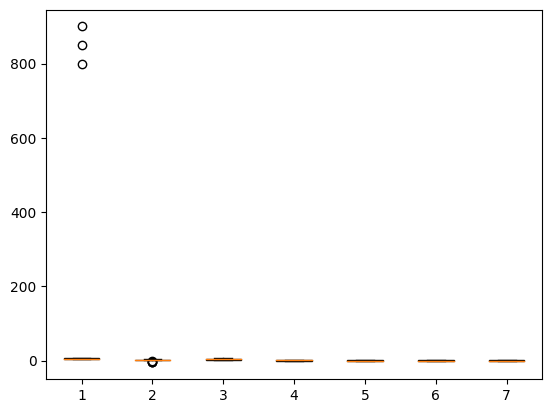

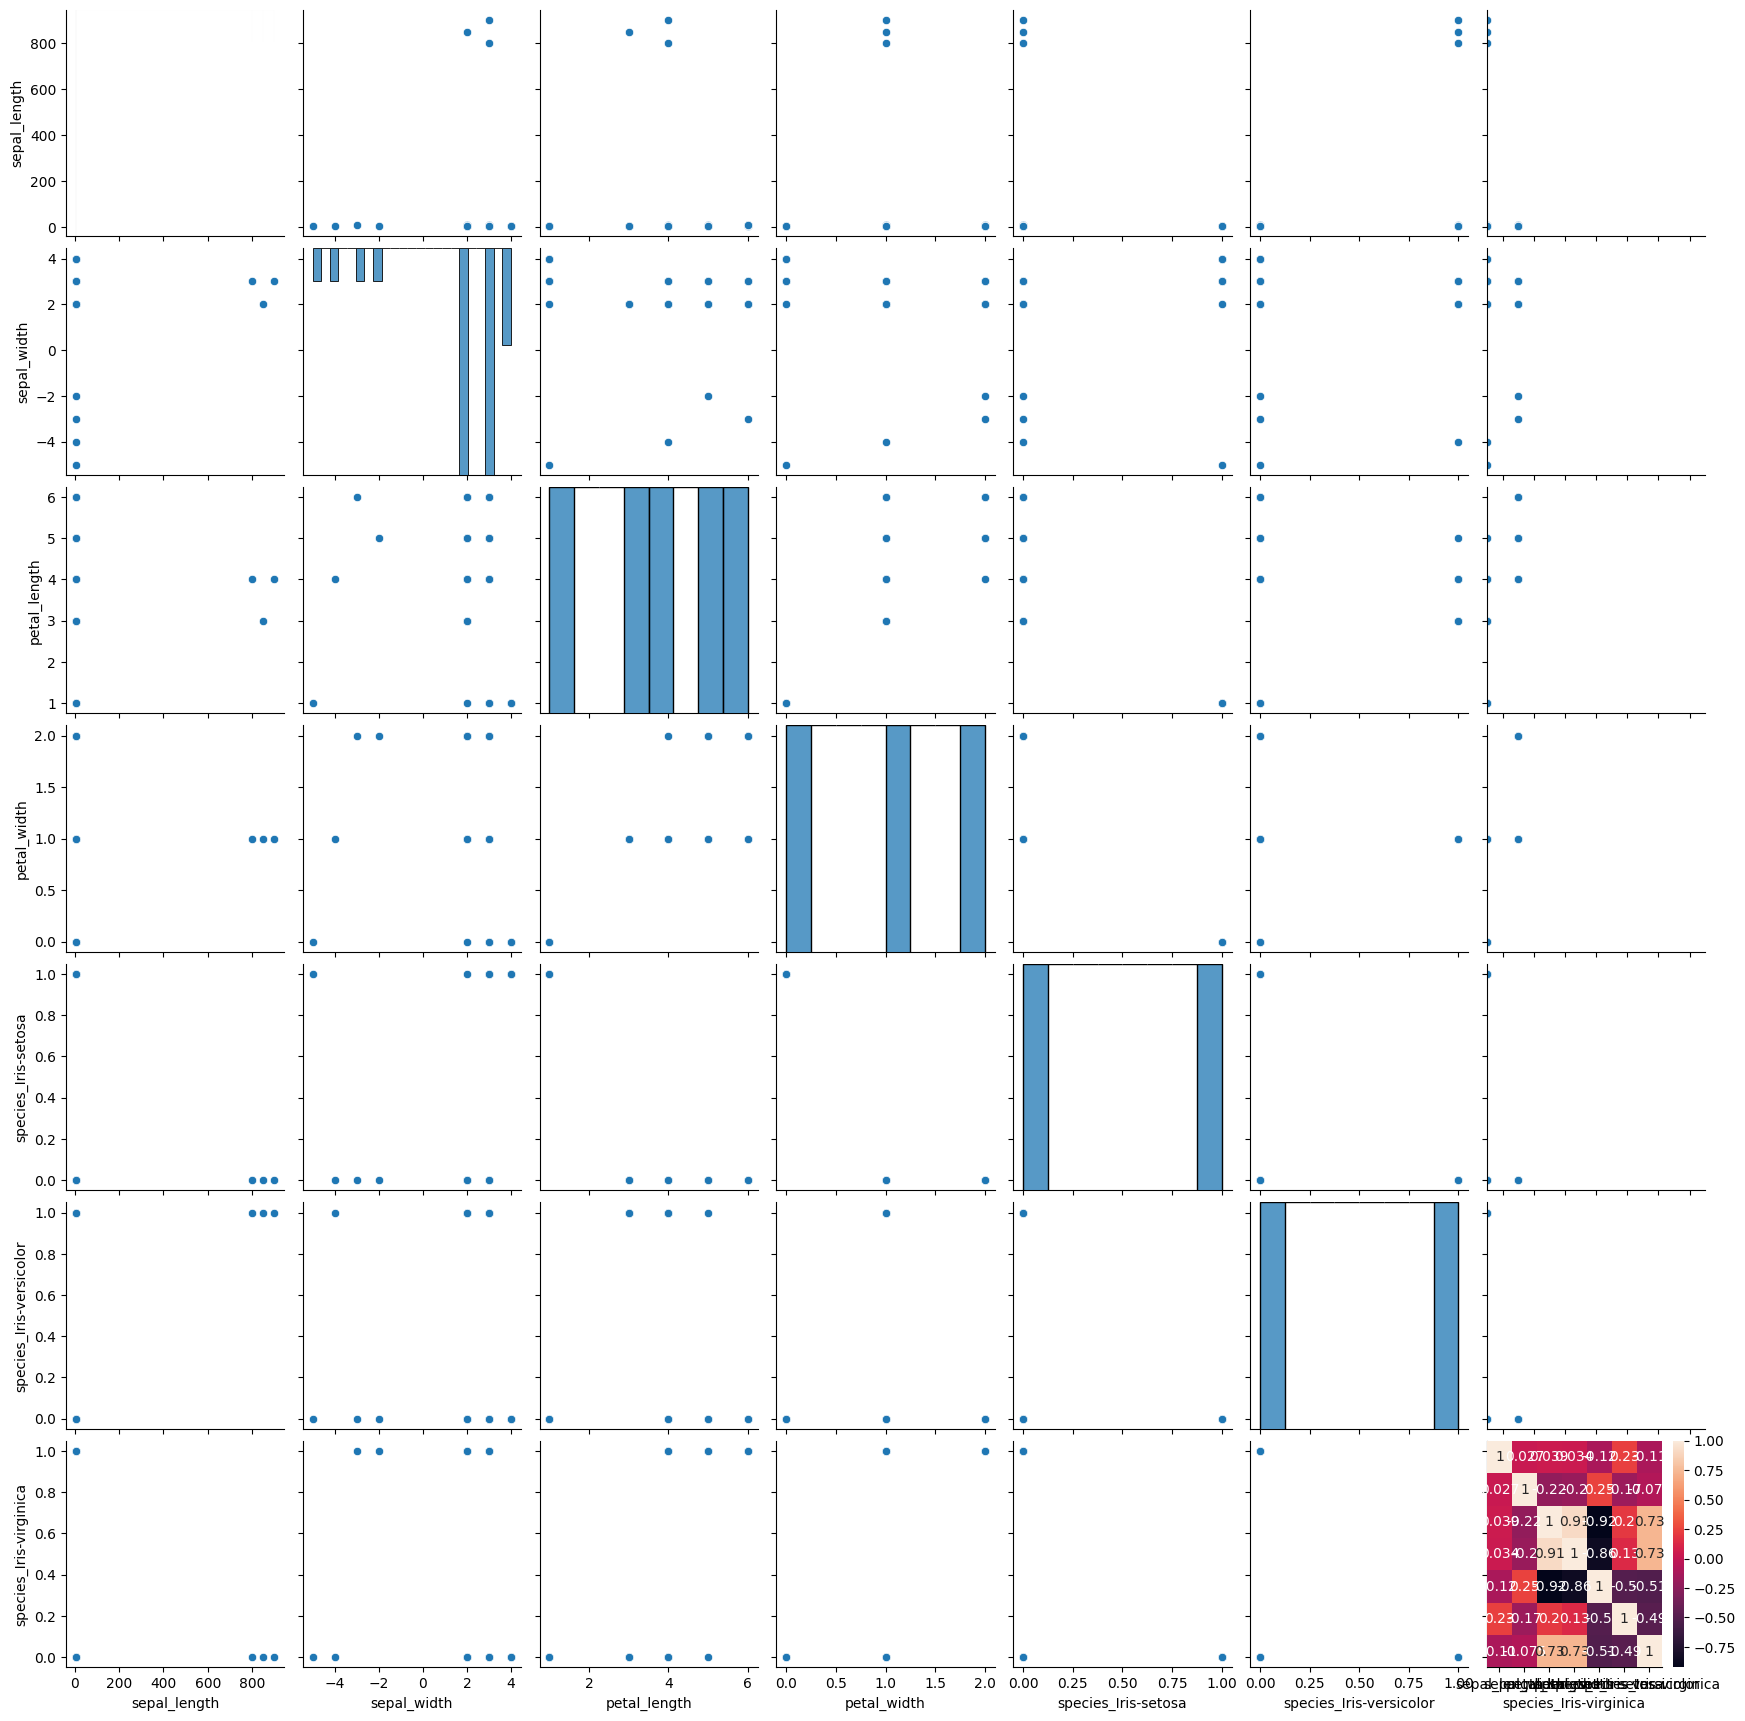

Dataset after adding new features
     sepal_length  sepal_width  petal_length  petal_width  \
0               5            3             1            0   
2               4            3             1            0   
3               4            3             1            0   
4               5            3             1            0   
5               5            3             1            0   
..            ...          ...           ...          ...   
146             6            3             5            2   
147             6            2             5            1   
148             6            3             5            2   
149             6            3             5            2   
150             5            3             5            1   

     species_Iris-setosa  species_Iris-versicolor  species_Iris-virginica  \
0                      1                        0                       0   
2                      1                        0                       0   
3 

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

class DataFraming:

  def __init__(self, path):
        self.path = path
        self.df = None
        self.numeric_col = None

  def loadData(self):
    self.df = pd.read_csv(self.path)
    self.numeric_col = self.df.select_dtypes(include=[np.number])
    self.df.head()
    print(self.df.head())

  def dataExploration(self):
    # df.shape
    self.df.describe()
    print(self.df.describe())
    print(self.df.dtypes)
    print(self.df.info())

  def displayMissingValue(self):
    missing_data = self.df.isnull().sum()
    print("Data Cleaning: Display the missing value in datasets: ")
    print(missing_data)

  def handleMissingvalue(self):
    #handle the missing value
    self.df = self.df.dropna()
    print("Data Cleaning: Display the Data after removing the missing values in the datasets ")
    print(self.df)

  def dataTypeConversion(self):
    # apply one hot encoding on categorical data
    one_hot_encoded_df = pd.get_dummies(self.df, columns=['species'])
    self.df = one_hot_encoded_df.astype(int)

  def findAndHandleOutliers(self):
    # find and remove the outliers through z-score
    num_col = self.df.select_dtypes(include=[np.number])
    z_scores = np.abs(stats.zscore(num_col))
    threshold = 3
    outliers = (z_scores > threshold).any(axis=1)
    #removing outliers
    self.df = self.df[~outliers]
    print("Data cleaning: Dataset after removing the outliers")
    print(self.df)

  def plotBoxDataAnalysis(self):
    data = [np.random.normal(0, std, 100) for std in range(1, 4)]

    plt.boxplot(self.df.select_dtypes(include=[np.number]),vert=True,patch_artist=True);

  def descriptiveDataAnalysis(self):
    mean = self.df.select_dtypes(include=[np.number]).mean()
    median = self.df.select_dtypes(include=[np.number]).median()
    mode = self.numeric_col.mode().iloc[0]
    std = self.numeric_col.std()

    print(f'Mean values {mean}')
    print(f'Median values {median}')
    print(f'Mode values {mode}')
    print(f'STD values {std}')

  def bivariateDataAnalysis(self):
    sns.pairplot(self.df)

  def correlationAnalysis(self):
    sns.heatmap(self.df.corr(numeric_only=True),annot=True)
    plt.show()

  def dataFeatureEngineering(self):
    self.df['petal_area'] = self.df['petal_length'] * self.df['petal_width']
    self.df['sepal_area'] = self.df['sepal_length'] * self.df['sepal_width']
    print("Dataset after adding new features")
    print(self.df)

  def dataFeatureScaling(self):
    min_max_scaler = MinMaxScaler()
    self.df = min_max_scaler.fit_transform(self.df)

    std_scaler = StandardScaler()
    self.df = std_scaler.fit_transform(self.df)

    print(self.df)

data = DataFraming(path='https://gist.githubusercontent.com/hafsahabib-educator/d9ac9be247866dba0c6f0b5debb9f5a0/raw/2bc1a43fda6dd28dff918dacd65a6c0254d1e579/gistfile1.txt')

data.loadData()
data.dataExploration()
data.displayMissingValue()
data.handleMissingvalue()
data.dataTypeConversion()
data.findAndHandleOutliers()

#visulization
data.plotBoxDataAnalysis()
data.descriptiveDataAnalysis()
data.bivariateDataAnalysis()
data.correlationAnalysis()
data.dataFeatureEngineering()
data.dataFeatureScaling()